In [531]:
#Importing necessay libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [532]:
#Load dataset
churn = pd.read_csv('telecom_churn_data.csv')
churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [533]:
churn.shape

(99999, 226)

In [534]:
# Printing variable datatypes and null values
churn.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [535]:
#Create a copy of the datset
data = churn.copy()

In [536]:
#Separating variables as different datatypes

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
            'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
            'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

bin_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
            'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

list1 = id_cols + date_cols +  bin_cols
num_cols = [cols for cols in churn.columns if cols not in list1]

In [537]:
print(f'No of columns in id_cols : {len(id_cols)}')
print(f'No of columns in date_cols : {len(date_cols)}')
print(f'No of columns in bin_cols : {len(bin_cols)}')
print(f'No of columns in num_cols : {len(num_cols)}')
print(f'sum of all columns : {len(id_cols + date_cols + bin_cols + num_cols)}')
print(f'No of columns in the churn dataset : {churn.shape[1]}')

No of columns in id_cols : 2
No of columns in date_cols : 12
No of columns in bin_cols : 8
No of columns in num_cols : 204
sum of all columns : 226
No of columns in the churn dataset : 226


In [538]:
# Dropping id_cols and date_cols
churn = churn.drop(id_cols + date_cols, axis = 1)
churn.shape

(99999, 212)

# Handling Missing Values

In [539]:
# Percentage of missing values for each column
pd.set_option('display.max_rows', None)
round(churn.isnull().sum()/len(churn.index)*100,2)

loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6    

### Missing Value Imputation

In [540]:
#Numeric columns having more than 70% missing values
cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
        'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
        'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
        'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
        'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
       'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
       'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']

churn[cols].describe().transpose()

count        mean         std    min   25%      50%  \
total_rech_data_6   25153.0    2.463802    2.789128   1.00   1.0    1.000   
total_rech_data_7   25571.0    2.666419    3.031593   1.00   1.0    1.000   
total_rech_data_8   26339.0    2.651999    3.074987   1.00   1.0    1.000   
total_rech_data_9   25922.0    2.441170    2.516339   1.00   1.0    2.000   
max_rech_data_6     25153.0  126.393392  108.477235   1.00  25.0  145.000   
max_rech_data_7     25571.0  126.729459  109.765267   1.00  25.0  145.000   
max_rech_data_8     26339.0  125.717301  109.437851   1.00  25.0  145.000   
max_rech_data_9     25922.0  124.941440  111.363760   1.00  25.0  145.000   
count_rech_2g_6     25153.0    1.864668    2.570254   0.00   1.0    1.000   
count_rech_2g_7     25571.0    2.044699    2.768332   0.00   1.0    1.000   
count_rech_2g_8     26339.0    2.016288    2.720132   0.00   1.0    1.000   
count_rech_2g_9     25922.0    1.781807    2.214701   0.00   1.0    1.000   
count_rech_3g_6     25153.0    0.599133    1.274428   0.00   0.0    0.000   
count_rech_3g_7     25571.0    0.621720    1.394524   0.00   0.0    0.000   
count_rech_3g_8     26339.0    0.635711    1.422827   0.00   0.0    0.000   
count_rech_3g_9     25922.0    0.659363    1.411513   0.00   0.0    0.000   
av_rech_amt_data_6  25153.0  192.600982  192.646318   1.00  82.0  154.000   
av_rech_amt_data_7  25571.0  200.981292  196.791224   0.50  92.0  154.000   
av_rech_amt_data_8  26339.0  197.526489  191.301305   0.50  87.0  154.000   
av_rech_amt_data_9  25922.0  192.734315  188.400286   1.00  69.0  164.000   
arpu_3g_6           25153.0   89.555057  193.124653 -30.82   0.0    0.480   
arpu_3g_7           25571.0   89.384120  195.893924 -26.04   0.0    0.420   
arpu_3g_8           26339.0   91.173849  188.180936 -24.49   0.0    0.880   
arpu_3g_9           25922.0  100.264116  216.291992 -71.09   0.0    2.605   
arpu_2g_6           25153.0   86.398003  172.767523 -35.83   0.0   10.830   
arpu_2g_7           25571.0   85.914450  176.379871 -15.48   0.0    8.810   
arpu_2g_8           26339.0   86.599478  168.247852 -55.83   0.0    9.270   
arpu_2g_9           25922.0   93.712026  171.384224 -45.74   0.0   14.800   

                       75%       max  
total_rech_data_6     3.00     61.00  
total_rech_data_7     3.00     54.00  
total_rech_data_8     3.00     60.00  
total_rech_data_9     3.00     84.00  
max_rech_data_6     177.00   1555.00  
max_rech_data_7     177.00   1555.00  
max_rech_data_8     179.00   1555.00  
max_rech_data_9     179.00   1555.00  
count_rech_2g_6       2.00     42.00  
count_rech_2g_7       2.00     48.00  
count_rech_2g_8       2.00     44.00  
count_rech_2g_9       2.00     40.00  
count_rech_3g_6       1.00     29.00  
count_rech_3g_7       1.00     35.00  
count_rech_3g_8       1.00     45.00  
count_rech_3g_9       1.00     49.00  
av_rech_amt_data_6  252.00   7546.00  
av_rech_amt_data_7  252.00   4365.00  
av_rech_amt_data_8  252.00   4076.00  
av_rech_amt_data_9  252.00   4061.00  
arpu_3g_6           122.07   6362.28  
arpu_3g_7           119.56   4980.90  
arpu_3g_8           122.07   3716.90  
arpu_3g_9           140.01  13884.31  
arpu_2g_6           122.07   6433.76  
arpu_2g_7           122.07   4809.36  
arpu_2g_8           122.07   3483.17  
arpu_2g_9           140.01   3467.17

### (i) Imputing missing values with zeros:  for those having a min value of 1. Here 0 implies that recharge was not done

In [541]:
zeros = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
        'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
        'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']

churn[zeros] = churn[zeros].apply(lambda x: x.fillna(0))

In [542]:
# Checking if there are missing values after imputation
churn[zeros].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

### (ii) Imputing bin_cols missing values using another category (-1)

In [543]:
#Imputing missing value with another category(-1)
churn[bin_cols] = churn[bin_cols].apply(lambda x: x.fillna(-1))

In [544]:
#Checking for missing values after imputation
churn[bin_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

### (iii) Drop the variables having more than 70% missing values

In [545]:
#Remaining columns with more than 70% missing values
col_to_drop = [column for column in cols if column not in zeros + bin_cols]
col_to_drop

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9']

In [546]:
#Drop the relevant columns
churn = churn.drop(col_to_drop, axis=1)

#Shape of the dataset after dropping the relevant columns
churn.shape

(99999, 196)

### (iv) Impute the remaining columns with 0

In [547]:
#Filtering columns having null values
rem_cols = churn[churn.notnull()].columns
rem_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=196)

In [548]:
#Imputing remaining columns with 0
churn[rem_cols] = churn[rem_cols].apply(lambda x: x.fillna(0))

In [549]:
#Checking for null values after imputation
churn.isnull().sum()/churn.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [550]:
#Shape of the dataset after missing value imputation
churn.shape

(99999, 196)

### Filtering High Value Customers

#### Calculate total data recharge amount

In [551]:
churn['total_data_recharge_6'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_6']
churn['total_data_recharge_7'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_7']

#### Add total recharge amount and total data recharge for combined recharge amount for the month

In [552]:
churn['total_recharge_6'] = churn['total_rech_amt_6'] + churn['total_data_recharge_6']
churn['total_recharge_7'] = churn['total_rech_amt_7'] + churn['total_data_recharge_7']

#### Average recharge done for 2 months

In [553]:
churn['avg_rech_6_7'] = (churn['total_recharge_6'] + churn['total_recharge_7'])/2

In [554]:
# Identify the 70th percentile of avg_rech_6_7
perc_70th = np.percentile(churn['avg_rech_6_7'], 70)
print('The 70th percentile for average recharge for 2 months is :',round(perc_70th,2))

The 70th percentile for average recharge for 2 months is : 455.0


In [555]:
#Filter out customers with avg recharge amount more than or equal to 455 to get high valued customers
churn_hv_cust = churn.loc[churn['avg_rech_6_7'] >= perc_70th]

In [556]:
# Shape of the dataset with high valued customers
churn_hv_cust.shape

(30009, 201)

In [557]:
#Delete variables used to create high value customer
churn_hv_cust= churn_hv_cust.drop(['total_data_recharge_6', 'total_data_recharge_7',
                                                  'total_recharge_6','total_recharge_7','avg_rech_6_7'], axis=1)

In [558]:
#shape of dataset after dropping the variables
churn_hv_cust.shape

(30009, 196)

### Derive Churn - using 9th month data

Customers are likely to churn if they dont have incoming/outgoing calls as well as dont do recharge for internet.

In [559]:
#Calculate total incoming and outgoing minutes of useage
churn_hv_cust['tot_mou_9'] = churn_hv_cust['total_ic_mou_9'] + churn_hv_cust['total_og_mou_9']

In [560]:
#Calculate total internet data consumed
churn_hv_cust['tot_internet_9'] = churn_hv_cust['vol_2g_mb_9'] + churn_hv_cust['vol_3g_mb_9']

In [561]:
#Create churn, if the customer not used calls or internet
#0-Not churned, 1- Churned
churn_hv_cust['Churn'] = churn_hv_cust.apply(lambda x: 0 if (x['tot_mou_9']>0) or (x['tot_internet_9']>0) else 1, axis=1)

In [562]:
# Delete derieved columns ,ie tot_mou_9 & tot_internet_9
churn_hv_cust = churn_hv_cust.drop(['tot_mou_9','tot_internet_9'], axis=1)

In [563]:
#Chruning Rate
round(churn_hv_cust['Churn'].value_counts(normalize=True)*100,2)

0    91.72
1     8.28
Name: Churn, dtype: float64

In [564]:
churn_hv_cust.shape

(30009, 197)

#### Calculate difference between 8th month and the average of the previous Months 6,7


In [565]:
# Calculate diff btw 8th and previous(6,7 months) avg

churn_hv_cust['arpu_diff'] = churn_hv_cust['arpu_8'] - (churn_hv_cust['arpu_6']+churn_hv_cust['arpu_7'])/2
churn_hv_cust['onnet_mou_diff'] = churn_hv_cust['onnet_mou_8'] - (churn_hv_cust['onnet_mou_6']+churn_hv_cust['onnet_mou_7'])/2
churn_hv_cust['offet_mou_diff'] = churn_hv_cust['offnet_mou_8'] - (churn_hv_cust['offnet_mou_6']+churn_hv_cust['offnet_mou_7'])/2
churn_hv_cust['roam_ic_mou_diff'] = churn_hv_cust['roam_ic_mou_8'] - (churn_hv_cust['roam_ic_mou_6']+churn_hv_cust['roam_ic_mou_7'])/2
churn_hv_cust['roam_og_mou_diff'] = churn_hv_cust['roam_og_mou_8'] - (churn_hv_cust['roam_og_mou_6']+churn_hv_cust['roam_og_mou_7'])/2
churn_hv_cust['loc_og_mou_diff'] = churn_hv_cust['loc_og_mou_8'] - (churn_hv_cust['loc_og_mou_6']+churn_hv_cust['loc_og_mou_7'])/2
churn_hv_cust['std_og_mou_diff'] = churn_hv_cust['std_og_mou_8'] - (churn_hv_cust['std_og_mou_6']+churn_hv_cust['std_og_mou_7'])/2
churn_hv_cust['isd_og_mou_diff'] = churn_hv_cust['isd_og_mou_8'] - (churn_hv_cust['isd_og_mou_6']+churn_hv_cust['isd_og_mou_7'])/2
churn_hv_cust['spl_og_mou_diff'] = churn_hv_cust['spl_og_mou_8'] - (churn_hv_cust['spl_og_mou_6']+churn_hv_cust['spl_og_mou_7'])/2
churn_hv_cust['total_og_mou_diff'] = churn_hv_cust['total_og_mou_8'] - (churn_hv_cust['total_og_mou_6']+churn_hv_cust['total_og_mou_7'])/2
churn_hv_cust['loc_ic_mou_diff'] = churn_hv_cust['loc_ic_mou_8'] - (churn_hv_cust['loc_ic_mou_6']+churn_hv_cust['loc_ic_mou_7'])/2
churn_hv_cust['std_ic_mou_diff'] = churn_hv_cust['std_ic_mou_8'] - (churn_hv_cust['std_ic_mou_6']+churn_hv_cust['std_ic_mou_7'])/2
churn_hv_cust['total_ic_mou_diff'] = churn_hv_cust['total_ic_mou_8'] - (churn_hv_cust['total_ic_mou_6']+churn_hv_cust['total_ic_mou_7'])/2
churn_hv_cust['spl_ic_mou_diff'] = churn_hv_cust['spl_ic_mou_8'] - (churn_hv_cust['spl_ic_mou_6']+churn_hv_cust['spl_ic_mou_7'])/2
churn_hv_cust['isd_ic_mou_diff'] = churn_hv_cust['isd_ic_mou_8'] - (churn_hv_cust['isd_ic_mou_6']+churn_hv_cust['isd_ic_mou_7'])/2
churn_hv_cust['total_rech_num_diff'] = churn_hv_cust['total_rech_num_8'] - (churn_hv_cust['total_rech_num_6']+churn_hv_cust['total_rech_num_7'])/2
churn_hv_cust['total_rech_amt_diff'] = churn_hv_cust['total_rech_amt_8'] - (churn_hv_cust['total_rech_amt_6']+churn_hv_cust['total_rech_amt_7'])/2
churn_hv_cust['max_rech_amt_diff'] = churn_hv_cust['max_rech_amt_8'] - (churn_hv_cust['max_rech_amt_6']+churn_hv_cust['max_rech_amt_7'])/2
churn_hv_cust['total_rech_data_diff'] = churn_hv_cust['total_rech_data_8'] - (churn_hv_cust['total_rech_data_6']+churn_hv_cust['total_rech_data_7'])/2
churn_hv_cust['max_rech_data_diff'] = churn_hv_cust['max_rech_data_8'] - (churn_hv_cust['max_rech_data_6']+churn_hv_cust['max_rech_data_7'])/2
churn_hv_cust['av_rech_amt_data_diff'] = churn_hv_cust['av_rech_amt_data_8'] - (churn_hv_cust['av_rech_amt_data_6']+churn_hv_cust['av_rech_amt_data_7'])/2
churn_hv_cust['vol_2g_mb_diff'] = churn_hv_cust['vol_2g_mb_8'] - (churn_hv_cust['vol_2g_mb_6']+churn_hv_cust['vol_2g_mb_7'])/2
churn_hv_cust['vol_3g_mb_diff'] = churn_hv_cust['vol_3g_mb_8'] - (churn_hv_cust['vol_3g_mb_6']+churn_hv_cust['vol_3g_mb_7'])/2

In [566]:
churn_hv_cust.shape

(30009, 220)

In [567]:
# Delete columns for 9th month from the high value chrun dataset
churn_hv_cust = churn_hv_cust.filter(regex ='[^9]$', axis =1)
churn_hv_cust.shape

(30009, 173)

In [568]:
#extract cols that ends with 9
cols_9 = churn.filter(regex ='[9]$', axis =1).columns

#update bin_cols and num_cols
bin_cols = [cols for cols in bin_cols if cols not in cols_9]
bin_cols.append('Churn')
num_cols = [column for column in churn_hv_cust.columns if column not in bin_cols]

### Data Visualization

In [569]:
cat_cols = bin_cols[:-1]
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

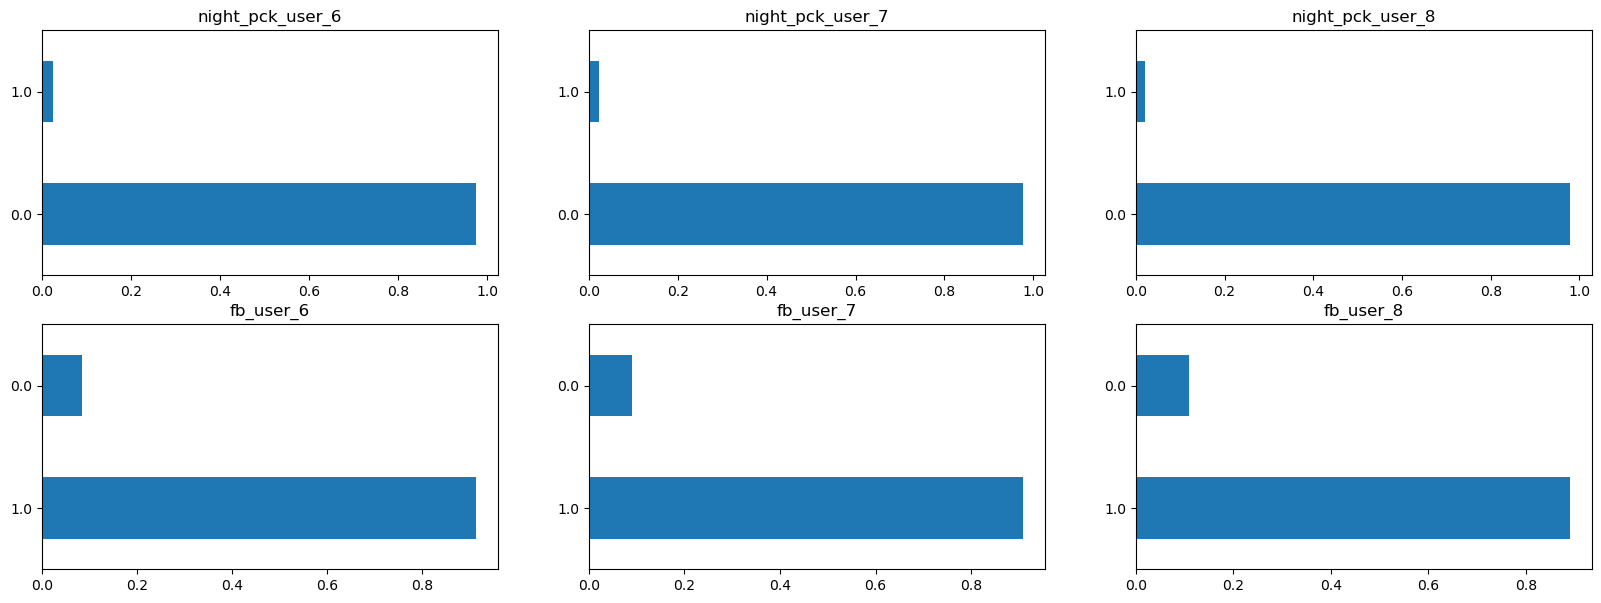

In [676]:
plt.figure(figsize=[20,7])
for ind, col in enumerate(cat_cols):
    plt.subplot(2,3,ind+1)
    data[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
plt.show()

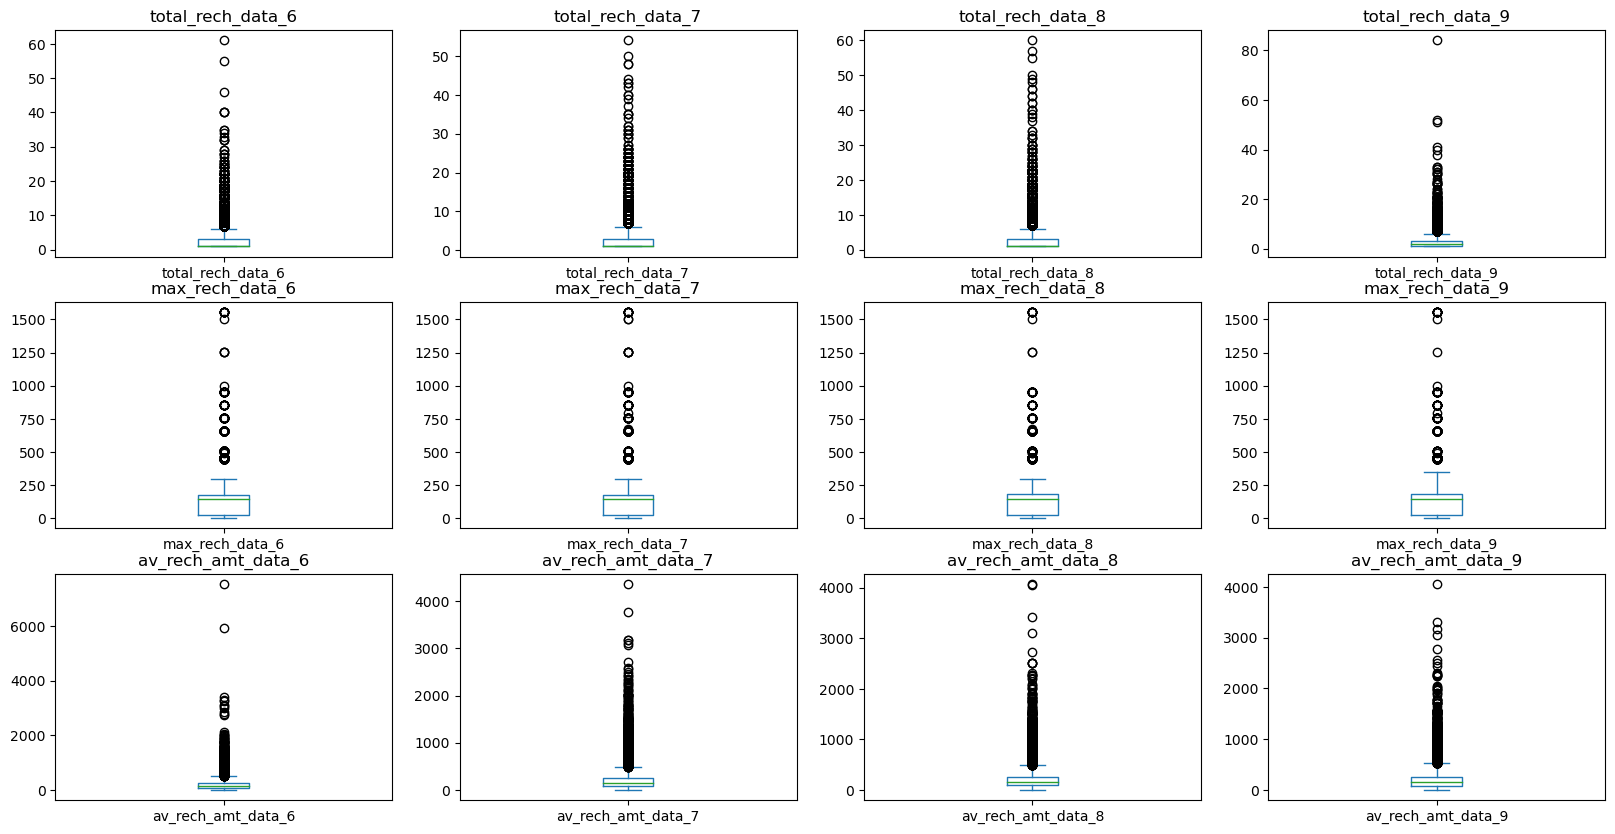

In [675]:
plt.figure(figsize=[20,10])
for ind, col in enumerate(zeros):
    plt.subplot(3,4,ind+1)
    data[col].plot.box()
    plt.title(col)
plt.show()

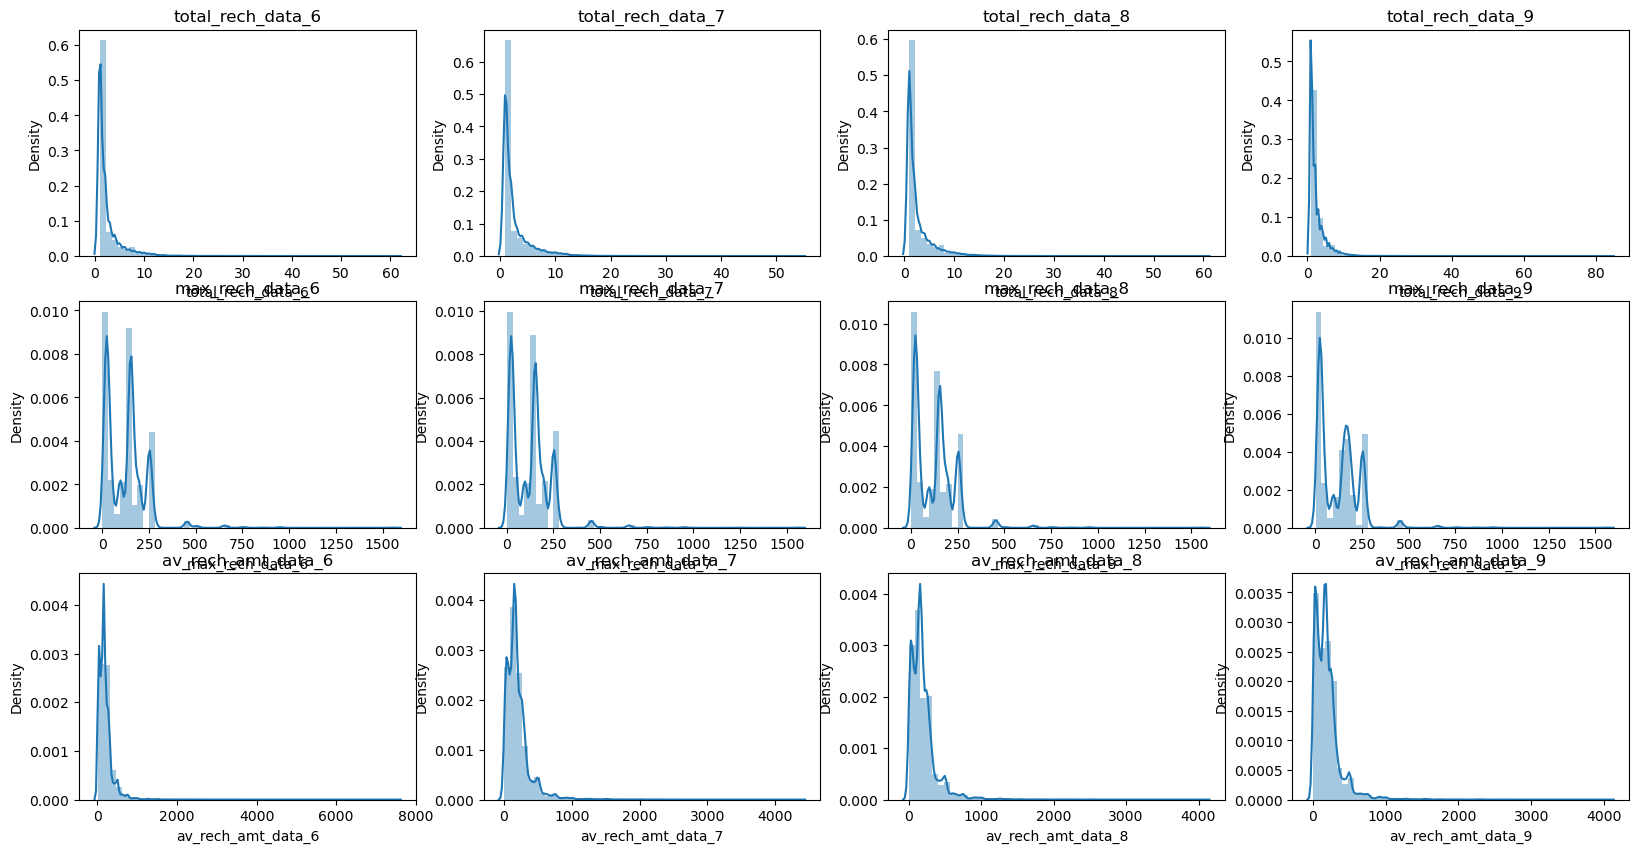

In [680]:
plt.figure(figsize=[20,10])
for ind, col in enumerate(zeros):
    plt.subplot(3,4,ind+1)
    sns.distplot(data[col])
    plt.title(col)
plt.show()

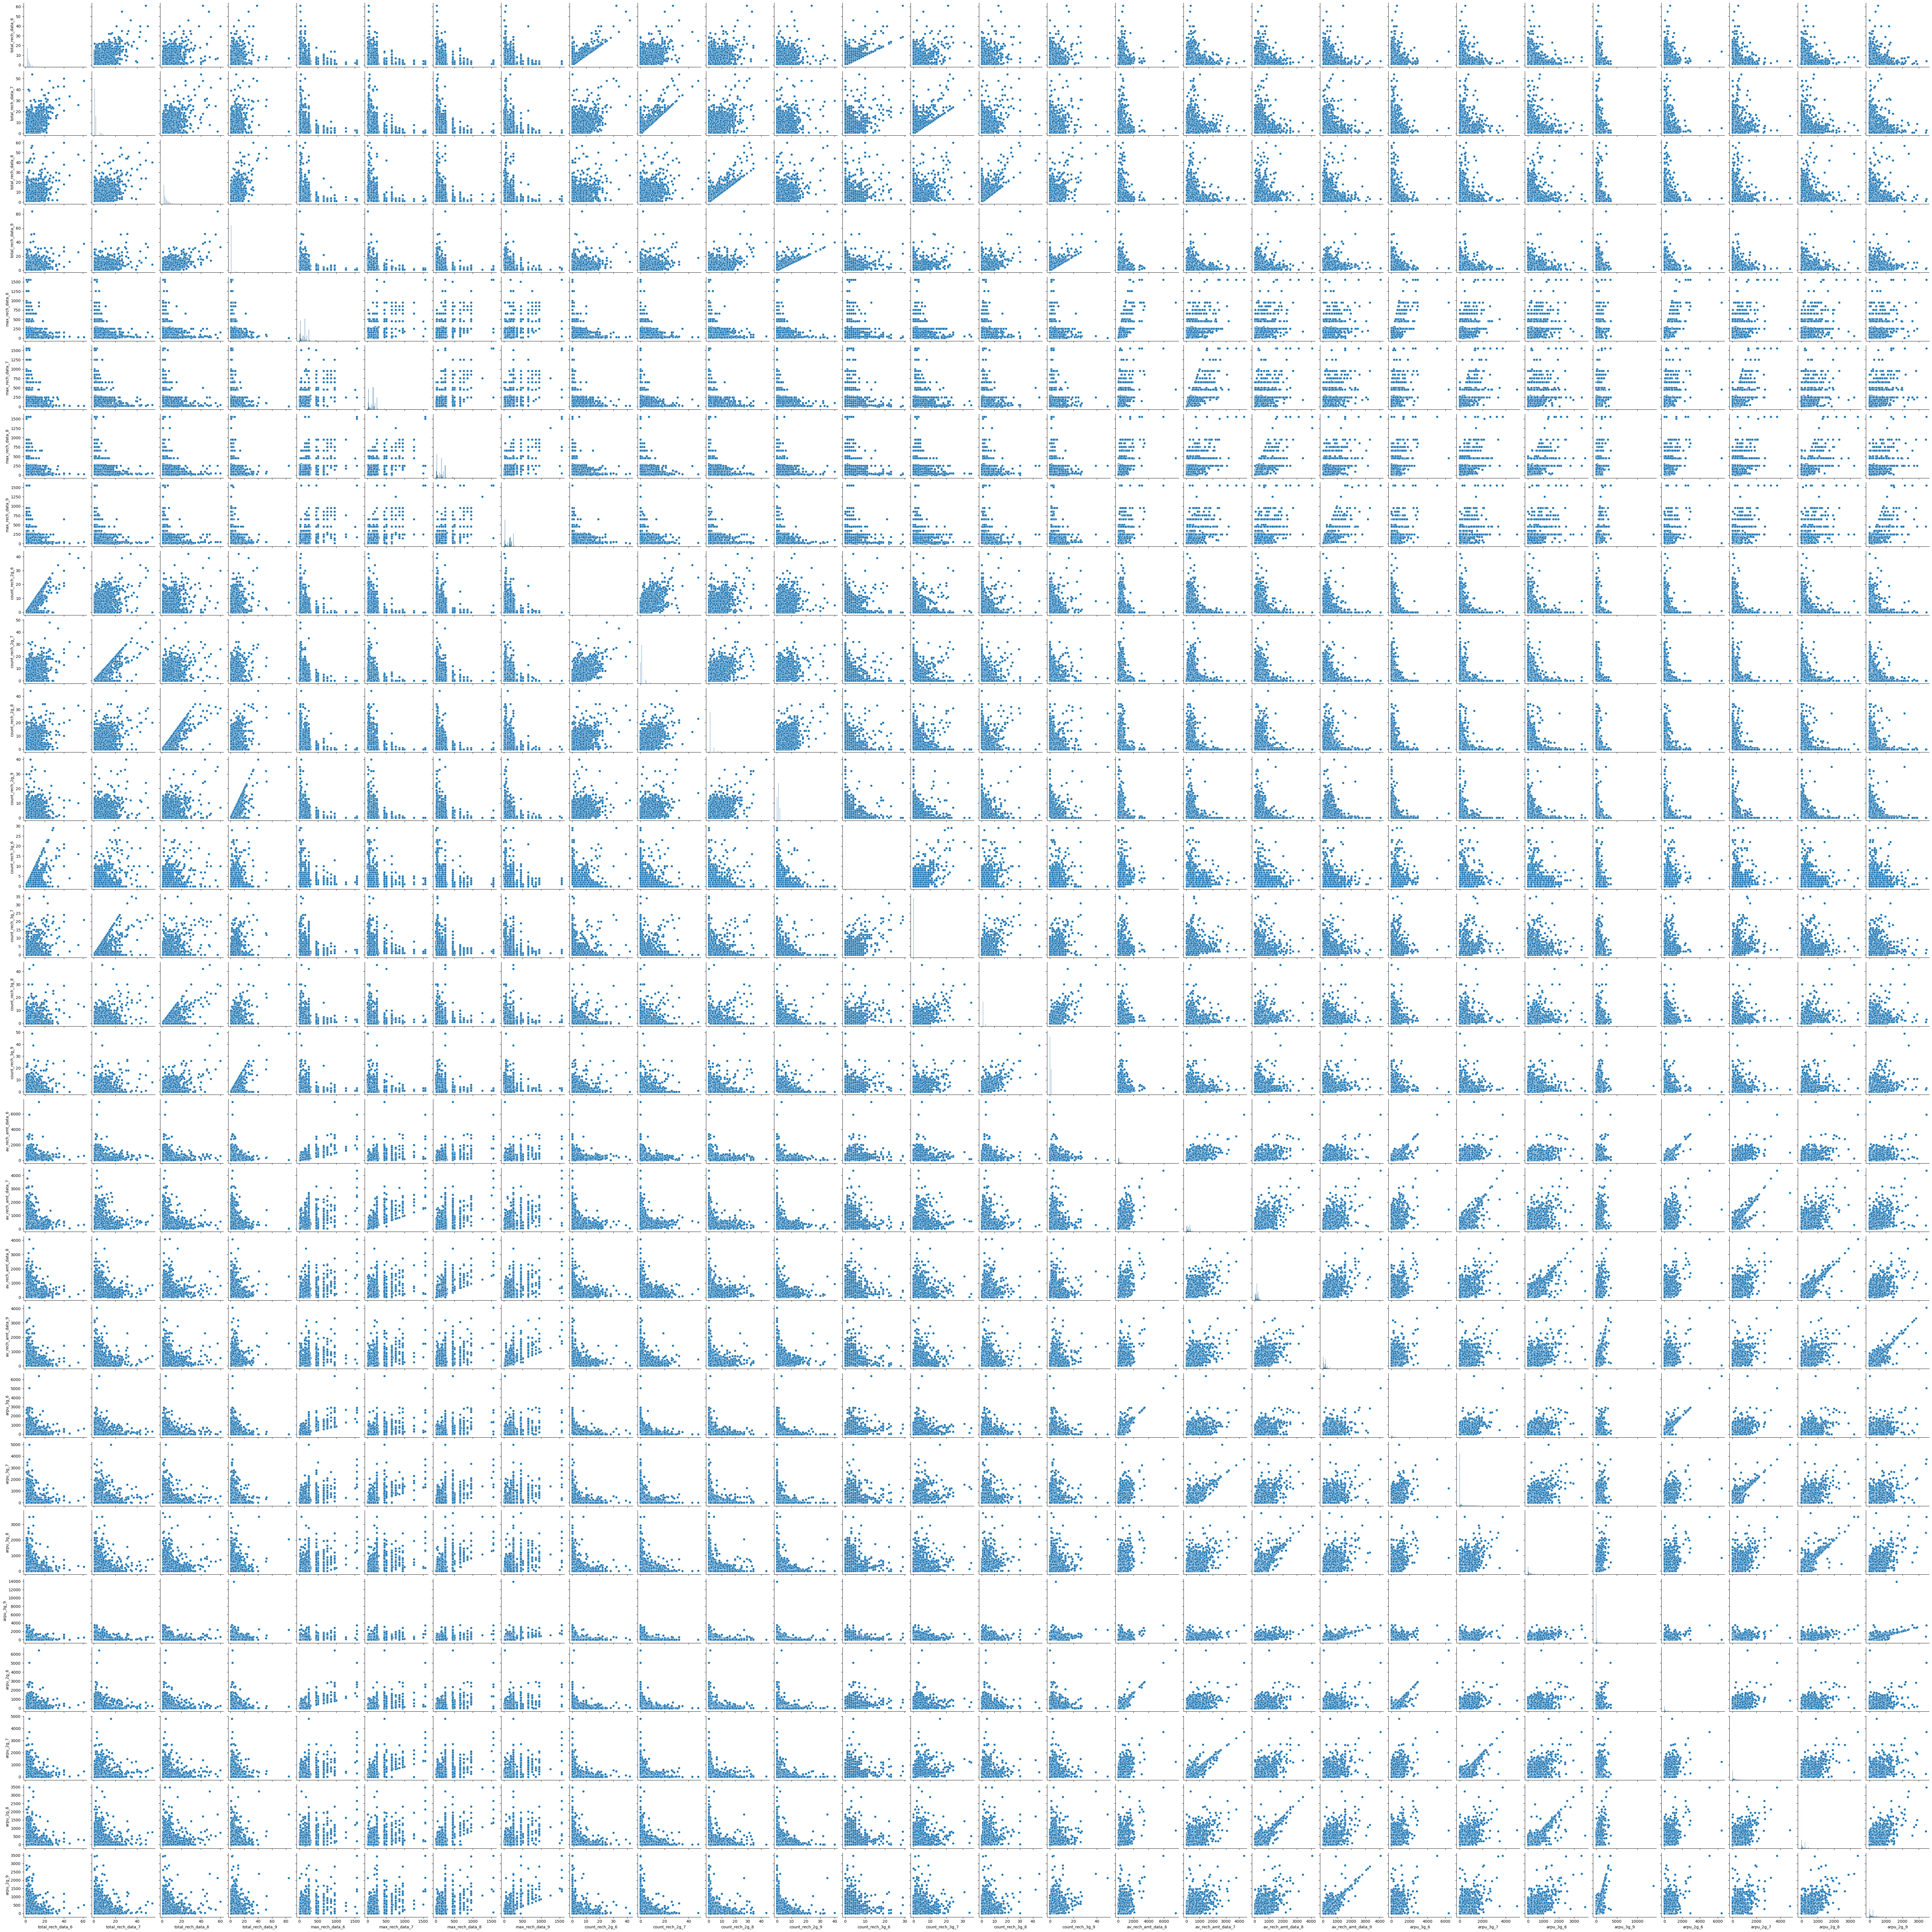

In [682]:
sns.pairplot(data[cols])
plt.show()

#### MODELLING


In [574]:
# Defining X, y
y = churn_hv_cust.pop('Churn')
X = churn_hv_cust

In [576]:
# Performing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)
print('X train shape:',X_train.shape)
print('X test shape:',X_test.shape)
print('y train shape:',y_train.shape)
print('y test shape:',y_test.shape)

X train shape: (22506, 172)
X test shape: (7503, 172)
y train shape: (22506,)
y test shape: (7503,)


### Scaling the data using StandardScaler

In [581]:
# Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implementating PCA for feature selection

In [583]:
from sklearn.decomposition import PCA

#Instantiate PCA
pca = PCA(random_state=42)
pca.fit(X_train_scaled)

PCA(random_state=42)

In [584]:
#Components of PCA
pca.components_

array([[ 8.01712268e-19, -2.22044605e-16, -0.00000000e+00, ...,
         2.78020680e-02,  2.32942787e-02,  6.45223866e-03],
       [-1.04560330e-19,  5.55111512e-17,  4.85722573e-17, ...,
         3.00371956e-02,  1.31235879e-02,  2.83393308e-02],
       [ 4.47568077e-19,  1.38777878e-16, -2.77555756e-17, ...,
         4.64855483e-02,  1.85126884e-02,  4.18445524e-02],
       ...,
       [-0.00000000e+00,  7.38974863e-02,  3.53682477e-02, ...,
         2.32747024e-01, -1.58612378e-02, -2.36975621e-02],
       [ 9.99990017e-01, -5.86470448e-04,  3.43992364e-03, ...,
         2.76288458e-04, -4.52937042e-06, -1.13744283e-04],
       [-0.00000000e+00,  5.36882465e-01, -1.73654267e-01, ...,
         3.34076526e-02, -4.57759810e-02, -1.03229131e-01]])

In [585]:
#Looking at explained variance ratio if each component
pca.explained_variance_ratio_

array([9.82292708e-02, 7.93910475e-02, 5.58828092e-02, 4.51717255e-02,
       3.97670326e-02, 3.57033515e-02, 2.94025275e-02, 2.59845497e-02,
       2.44464455e-02, 2.19829533e-02, 2.07586961e-02, 2.03213031e-02,
       1.89924680e-02, 1.78660511e-02, 1.70841049e-02, 1.67683142e-02,
       1.57825593e-02, 1.47313865e-02, 1.45344299e-02, 1.32772291e-02,
       1.29785197e-02, 1.26058665e-02, 1.23452262e-02, 1.16257811e-02,
       1.11516603e-02, 1.10142441e-02, 1.04706212e-02, 1.04309204e-02,
       1.01527516e-02, 9.96829458e-03, 9.43829147e-03, 9.12335988e-03,
       8.99758133e-03, 8.66390125e-03, 8.42916917e-03, 8.28761460e-03,
       7.93055090e-03, 7.43717520e-03, 7.36048947e-03, 7.27097606e-03,
       6.97974384e-03, 6.88939748e-03, 6.70167057e-03, 6.28068533e-03,
       5.91351568e-03, 5.36029849e-03, 5.23592950e-03, 5.08827999e-03,
       5.04048617e-03, 4.85702913e-03, 4.65449855e-03, 4.60308837e-03,
       4.45008687e-03, 4.04591228e-03, 3.90615266e-03, 3.83767516e-03,
      

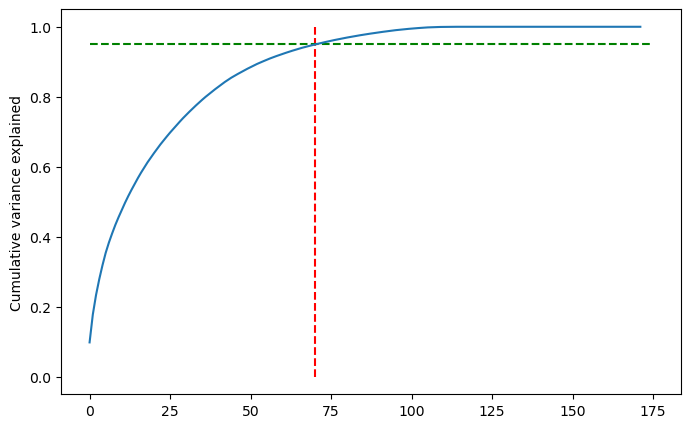

In [586]:
#Making a scree plot for the explained variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[8,5])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=175, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

From the plot we can see that 95% of the variance in the data is captured using first 70 Principal components.So we will be using these to make prediction for our model

Perform PCA with 70 components

In [600]:
pca_final = PCA(n_components=70)
X_train_pca = pca_final.fit_transform(X_train_scaled)

In [602]:
X_train_pca.shape

(22506, 70)

In [607]:
# Applying the transformation on the test set
X_test_pca = pca_final.transform(X_test_scaled)
X_test_pca.shape

(7503, 70)

## Applying logistic regression on the data on our Principal components

In [608]:
logreg_pca = LogisticRegression(class_weight={0:0.1, 1:0.9})
model_pca = logreg_pca.fit(X_train_pca, y_train)

### EVALUATE ON TEST DATA

In [609]:
#Predict churn on test data
y_pred = model_pca.predict(X_test_pca)

In [610]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives


print(classification_report(y_test, y_pred))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred),2))
print('Area under ROC Curve:', round(roc_auc_score(y_test, y_pred),2))
# sensitivity of our logistic regression model
print('Sensitivity:',round(TP /float(TP+FN),2))

# Specificity of our logistic regression model
print('Specificity :',round(TN / float(TN+FP),2))


              precision    recall  f1-score   support

           0       0.98      0.84      0.91      6882
           1       0.32      0.82      0.46       621

    accuracy                           0.84      7503
   macro avg       0.65      0.83      0.68      7503
weighted avg       0.93      0.84      0.87      7503

Accuracy Score: 0.84
Area under ROC Curve: 0.83
Sensitivity: 0.82
Specificity : 0.84


### Hyperparameter Tuning for PCA-Logistics Regression

In [614]:
#Hyperparameter tuning
params= {'C' : [0.01,0.1,10,20],
         'penalty': ['l1','l2']
        }

#Performing GridSearchCV
model = GridSearchCV(estimator= logreg_pca,
                     param_grid = params,
                     scoring = 'accuracy',
                     cv = 5,
                     verbose=True,
                     n_jobs = -1)
model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9}),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 10, 20], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=True)

In [616]:
#Print best score
print(model.best_score_)

0.8463964224939993


In [618]:
#Best Parameters
print(model.best_params_)

{'C': 0.01, 'penalty': 'l2'}


In [619]:
#Best Estimatore
print(model.best_estimator_)

LogisticRegression(C=0.01, class_weight={0: 0.1, 1: 0.9})


In [620]:
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.020702      0.006240         0.000000        0.000000    0.01   
1       0.378001      0.018032         0.006248        0.007653    0.01   
2       0.021928      0.006405         0.000000        0.000000     0.1   
3       0.678665      0.035108         0.006250        0.007655     0.1   
4       0.031249      0.000008         0.000000        0.000000      10   
5       1.086685      0.130888         0.004730        0.006272      10   
6       0.031352      0.000210         0.000000        0.000000      20   
7       0.911298      0.209411         0.003124        0.006249      20   

  param_penalty                        params  split0_test_score  \
0            l1  {'C': 0.01, 'penalty': 'l1'}                NaN   
1            l2  {'C': 0.01, 'penalty': 'l2'}           0.848512   
2            l1   {'C': 0.1, 'penalty': 'l1'}                NaN   
3            l2   {'C': 0.1, 'penalty': 'l2'}           0.846068   
4            l1    {'C': 10, 'penalty': 'l1'}                NaN   
5            l2    {'C': 10, 'penalty': 'l2'}           0.844069   
6            l1    {'C': 20, 'penalty': 'l1'}                NaN   
7            l2    {'C': 20, 'penalty': 'l2'}           0.844291   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1           0.844035           0.844257           0.844701           0.850478   
2                NaN                NaN                NaN                NaN   
3           0.838925           0.842035           0.842035           0.847589   
4                NaN                NaN                NaN                NaN   
5           0.836925           0.840480           0.838925           0.844701   
6                NaN                NaN                NaN                NaN   
7           0.836703           0.840480           0.839147           0.844923   

   mean_test_score  std_test_score  rank_test_score  
0              NaN             NaN                5  
1         0.846396        0.002614                1  
2              NaN             NaN                6  
3         0.843331        0.003111                2  
4              NaN             NaN                7  
5         0.841020        0.002977                4  
6              NaN             NaN                8  
7         0.841109        0.003109                3

In [621]:
# Predicting Churn on Test Data
y_pred = model.predict(X_test_pca)

In [622]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives


print(classification_report(y_test, y_pred))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred),2))
print('Area under ROC Curve:', round(roc_auc_score(y_test, y_pred),2))
# sensitivity of our logistic regression model
print('Sensitivity:',round(TP /float(TP+FN),2))

# Specificity of our logistic regression model
print('Specificity :',round(TN / float(TN+FP),2))


              precision    recall  f1-score   support

           0       0.98      0.85      0.91      6882
           1       0.32      0.80      0.46       621

    accuracy                           0.84      7503
   macro avg       0.65      0.83      0.68      7503
weighted avg       0.92      0.84      0.87      7503

Accuracy Score: 0.84
Area under ROC Curve: 0.83
Sensitivity: 0.8
Specificity : 0.85


The values are slightly better than the original model

## USING RANDOM FOREST

In [631]:
rf = RandomForestClassifier(random_state = 42, oob_score=True,class_weight={0:0.1,1:0.9})

In [632]:
params = {
    'criterion': ['gini','entropy'],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [633]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="roc_auc")

In [634]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Wall time: 22min 23s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='roc_auc', verbose=1)

In [637]:
print(grid_search.best_score_)

0.9318617401710896


In [638]:
print(grid_search.best_estimator_)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=20, min_samples_leaf=10, oob_score=True,
                       random_state=42)


In [639]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 100}


In [641]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.609858      0.048812         0.031201        0.008307   
1         1.215405      0.103782         0.029600        0.001356   
2         2.216300      0.049577         0.049400        0.009708   
3         4.502256      0.193346         0.069801        0.002481   
4         0.506663      0.027385         0.027400        0.007060   
5         1.268274      0.051300         0.034400        0.003877   
6         2.235057      0.135951         0.042401        0.001355   
7         4.529753      0.121446         0.071814        0.002849   
8         0.480998      0.010257         0.024600        0.001744   
9         1.279825      0.100470         0.035200        0.005912   
10        2.288523      0.083081         0.046000        0.002531   
11        4.882501      0.226249         0.075615        0.004128   
12        0.520840      0.040249         0.024199        0.005036   
13        1.349501      0.080022         0.038080        0.003290   
14        2.779512      0.270370         0.078598        0.023694   
15        6.694198      1.676384         0.159527        0.038903   
16        0.952744      0.064514         0.054194        0.021877   
17        3.064778      0.607679         0.094689        0.040244   
18        4.410846      1.086065         0.080620        0.012997   
19        7.502143      1.182695         0.091773        0.005319   
20        0.953527      0.136938         0.051899        0.018872   
21        2.025289      0.134865         0.063352        0.019960   
22        3.716384      0.488433         0.074661        0.022183   
23        6.749706      0.797177         0.108110        0.024344   
24        1.111544      0.084569         0.045473        0.013759   
25        2.572191      0.290344         0.067872        0.011333   
26        4.704107      0.446503         0.085535        0.036145   
27        8.438144      0.755626         0.118854        0.018604   
28        1.162149      0.078512         0.045244        0.016021   
29        2.490935      0.290901         0.055649        0.006813   
30        4.789570      0.578301         0.096756        0.019155   
31        9.474218      2.001558         0.120872        0.033378   
32        1.323188      0.195106         0.053499        0.019779   
33        2.707123      0.617078         0.066469        0.037100   
34        4.870260      0.642073         0.080130        0.017177   
35        8.880274      1.184120         0.121064        0.019457   
36        1.158910      0.055743         0.052759        0.010082   
37        2.496488      0.246020         0.055777        0.019749   
38        5.302443      0.864880         0.085676        0.005287   
39        8.625493      0.675937         0.104544        0.017583   
40        1.101156      0.203070         0.032748        0.006720   
41        2.327925      0.268985         0.054022        0.013902   
42        4.474226      0.337306         0.063801        0.007874   
43        9.166566      0.744701         0.116879        0.009170   
44        0.931121      0.168012         0.052309        0.009063   
45        3.006845      0.358539         0.063275        0.011540   
46        5.044974      0.614120         0.081969        0.023086   
47        8.994188      1.213382         0.144700        0.024106   
48        1.606795      0.112475         0.062123        0.021035   
49        3.912199      0.511243         0.081895        0.023753   
50        7.176149      0.892777         0.100208        0.015937   
51       12.944015      1.139109         0.160624        0.013778   
52        1.665481      0.055233         0.059364        0.013308   
53        3.862136      0.363923         0.057974        0.013084   
54        6.791879      0.631658         0.094073        0.019281   
55       13.770857      1.231567         0.159889        0.026912   
56        1.513469      0.157620         0.042269        0.009938   
57 

In [649]:
#prediction on test data
y_pred = grid_search.predict(X_test)

In [643]:
#Confusion matrix

cm = confusion_matrix(y_test, y_pred)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives


print(classification_report(y_test, y_pred))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred),2))
print('Area under ROC Curve:', round(roc_auc_score(y_test, y_pred),2))
# sensitivity of our logistic regression model
print('Sensitivity:',round(TP /float(TP+FN),2))

# Specificity of our logistic regression model
print('Specificity :',round(TN / float(TN+FP),2))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6882
           1       0.60      0.67      0.63       621

    accuracy                           0.94      7503
   macro avg       0.79      0.81      0.80      7503
weighted avg       0.94      0.94      0.94      7503

Accuracy Score: 0.94
Area under ROC Curve: 0.81
Sensitivity: 0.67
Specificity : 0.96


### Building model using best parameters 

In [645]:
#choosing best features
max_features = int(round(np.sqrt(X_train.shape[1])))
print(max_features)

13


In [646]:
rf_best_model = RandomForestClassifier(n_estimators= 100,
                                       max_features= max_features,
                                       criterion='entropy',
                                       max_depth=20,
                                       min_samples_leaf=10,
                                       class_weight= {0:0.1, 1:0.9},
                                       n_jobs = -1,
                                       verbose=1,
                                       oob_score=True,
                                       random_state=42)                              

In [647]:
#Fit Model
rf_best_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=20, max_features=13, min_samples_leaf=10,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [648]:
#OOB Score
rf_best_model.oob_score_

0.9359726295210166

In [650]:
#prediction on test data
y_pred = rf_best_model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [651]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

cm = confusion_matrix(y_test, y_pred)
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives


print(classification_report(y_test, y_pred))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred),2))
print('Area under ROC Curve:', round(roc_auc_score(y_test, y_pred),2))
# sensitivity of our logistic regression model
print('Sensitivity:',round(TP /float(TP+FN),2))

# Specificity of our logistic regression model
print('Specificity :',round(TN / float(TN+FP),2))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6882
           1       0.60      0.67      0.63       621

    accuracy                           0.94      7503
   macro avg       0.79      0.81      0.80      7503
weighted avg       0.94      0.94      0.94      7503

Accuracy Score: 0.94
Area under ROC Curve: 0.81
Sensitivity: 0.67
Specificity : 0.96


### Extracting top 30 features

In [652]:
rf_best_model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.22958041e-03,
       5.74161184e-03, 2.28683334e-02, 4.11387434e-03, 4.32309173e-03,
       6.23465634e-03, 3.97402095e-03, 3.69989900e-03, 1.56598499e-02,
       1.45997733e-03, 2.47038037e-03, 1.58184206e-02, 1.44369129e-03,
       3.31179220e-03, 1.69710407e-02, 3.99930348e-03, 3.73920444e-03,
       1.30784730e-02, 5.32716219e-03, 3.94496033e-03, 3.05542915e-02,
       2.76198367e-03, 2.06861212e-03, 4.82544698e-03, 1.03776821e-03,
       1.06097402e-03, 8.40625784e-04, 4.71787384e-03, 4.26548757e-03,
       2.84130476e-02, 2.87079344e-03, 2.73459619e-03, 2.52477325e-03,
       3.43077978e-03, 2.86276526e-03, 6.76303484e-03, 6.43671839e-04,
       6.11182494e-04, 4.22094978e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.88088988e-03, 4.52034746e-03, 4.59464069e-03,
       4.60019528e-04, 1.04222424e-03, 6.71665798e-04, 2.71262778e-03,
       2.77620075e-03, 2.30442884e-03, 1.00023167e-03, 0.00000000e+00,
      

In [654]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best_model.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False).head(30)

Varname       Imp
89        total_ic_mou_8  0.065397
65      loc_ic_t2m_mou_8  0.049114
71          loc_ic_mou_8  0.046563
165  total_rech_amt_diff  0.031310
23      loc_og_t2m_mou_8  0.030554
32          loc_og_mou_8  0.028413
149            arpu_diff  0.026281
62      loc_ic_t2t_mou_8  0.025222
5                 arpu_8  0.022868
110   last_day_rch_amt_8  0.022791
107       max_rech_amt_8  0.021178
59        total_og_mou_8  0.020321
104     total_rech_amt_8  0.019618
158    total_og_mou_diff  0.019067
17         roam_og_mou_8  0.016971
14         roam_ic_mou_8  0.015818
11          offnet_mou_8  0.015660
119   av_rech_amt_data_8  0.015616
155      std_og_mou_diff  0.013830
20      loc_og_t2t_mou_8  0.013078
152     roam_ic_mou_diff  0.012198
68      loc_ic_t2f_mou_8  0.012133
159      loc_ic_mou_diff  0.011922
161    total_ic_mou_diff  0.011765
153     roam_og_mou_diff  0.011374
164  total_rech_num_diff  0.011336
86          std_ic_mou_8  0.010566
154      loc_og_mou_diff  0.008676
116      max_rech_data_8  0.008411
143            fb_user_8  0.008247

#### recommended strategies to manage customer churn

- Churning rate seems to increase after first 2 months of usuage. Providing longer validity packages for incoming/outgoing calls may lead to reduction churning rate.
- Increasing minutes of usage for incoming and outgoing calls for monthly recharge plan. 
- Providing offers every 3rd month might stop people from switching to different telecom network
- local calls mostly used compared to std & isd